In [2]:
import cv2
from final_function import BotFinder
import time
import numpy as np
import threading 
from grid_maker import GridMaker
from video2 import vdo_tbar
import math
from collections import deque
import json
import datetime
import matplotlib.pyplot as plt
from sklearn import decomposition


In [160]:
data_set = np.zeros((10000,2000))
n = 0
for  i in range(1,500,1) :#2210
    try:
        temp = cv2.imread(f'C:/Users/OHM/Desktop/pytthon/2210/{i}.png')
        i+=1
        # flat1 = np.ravel(temp[:,:,0])
        # flat2 = np.ravel(temp[:,:,1])
        # flat3 = np.ravel(temp[:,:,2])
        # flat = np.append(flat1,flat2)
        # flat = np.append(flat,flat3)

        gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        flat = np.ravel(gray)
        data_set[:,n] = flat
        n+=1
    except:pass  

for  i in range(1,500,1) :#0122
    try:
        temp = cv2.imread(f'C:/Users/OHM/Desktop/pytthon/0122/{i}.png')
        i+=1
        # flat1 = np.ravel(temp[:,:,0])
        # flat2 = np.ravel(temp[:,:,1])
        # flat3 = np.ravel(temp[:,:,2])
        # flat = np.append(flat1,flat2)
        # flat = np.append(flat,flat3)

        gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        flat = np.ravel(gray)
        data_set[:,n] = flat
        n+=1
    except:pass 

for  i in range(1,500,1) :#2122
    try:
        temp = cv2.imread(f'C:/Users/OHM/Desktop/pytthon/2122/{i}.png')
        i+=1
        # gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        # flat1 = np.ravel(temp[:,:,0])
        # flat2 = np.ravel(temp[:,:,1])
        # flat3 = np.ravel(temp[:,:,2])
        # flat = np.append(flat1,flat2)
        # flat = np.append(flat,flat3)

        gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        flat = np.ravel(gray)        
        data_set[:,n] = flat
        n+=1

    except:pass  

for  i in range(1,500,1) :#2010
    try:
        temp = cv2.imread(f'C:/Users/OHM/Desktop/pytthon/2010/{i}.png')
        i+=1
        # gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        # flat1 = np.ravel(temp[:,:,0])
        # flat2 = np.ravel(temp[:,:,1])
        # flat3 = np.ravel(temp[:,:,2])
        # flat = np.append(flat1,flat2)
        # flat = np.append(flat,flat3)

        gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        flat = np.ravel(gray)
        data_set[:,n] = flat
        n+=1        
    except:pass  
       
# for i in range(1,51,1) :
#     temp = cv2.imread(f'C:/Users/OHM/Desktop/ML_training/training_data/triangle/{i}.png')
#     i+=1
#     try:
#         gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
#         _,thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY_INV)
#         cv2.imshow('thresh',)
#         cv2.waitKey(5000)
#         flat = np.ravel(thresh)
#         data_set[:,n] = flat
#         n+=1
#     except:pass
print(data_set.shape)

(10000, 2000)


In [80]:
pca = decomposition.PCA(n_components=50)
x = pca.fit_transform(data_set.T)

In [195]:
X_test = np.zeros((10000,2500))
n = 0
pass_no = 0
gray_success =0
for  i in range(0,2500,1) :#0122
    try:
        temp = cv2.imread(f'C:/Users/OHM/Desktop/pytthon/2210/{i}.png')
        i+=1
        # flat1 = np.ravel(temp[:,:,0])
        # flat2 = np.ravel(temp[:,:,1])
        # flat3 = np.ravel(temp[:,:,2])
        # flat = np.append(flat1,flat2)
        # flat = np.append(flat,flat3)
        
        gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        flat = np.ravel(gray)
        gray_success +=1

        X_test[:,n] = flat
        n+=1

    except:pass_no+=1 
print(pass_no,gray_success)
X_test = X_test.T


14 2486


In [196]:

X_test=pca.transform(X_test)

X_pred = loaded_model.predict(X_test)

In [197]:
fail = 0
for i in range(2500):
    if X_pred[i] != 0: fail+=1
print(fail)

292


<Figure size 400x400 with 0 Axes>

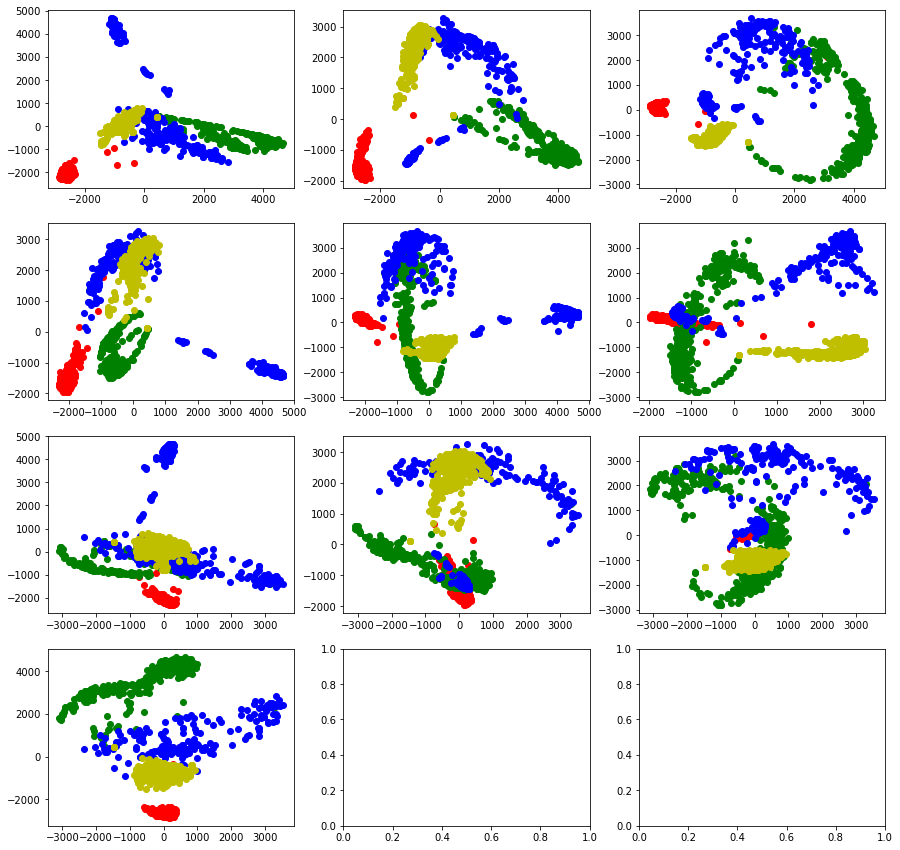

In [161]:

plt.figure(figsize=(5, 5), dpi=80)

# print(x[0])
f, axs = plt.subplots(4,3,figsize=(15,15))
plt.subplot(4,3,1)
plt.plot(x[:500,0],x[:500,1],'or')#2210
plt.plot(x[500:1000,0],x[500:1000,1],'og')#0122
plt.plot(x[1000:1500,0],x[1000:1500,1],'ob')#2122
plt.plot(x[1500:2000,0],x[1500:2000,1],'oy')#2010

plt.subplot(4,3,2)
plt.plot(x[:500,0],x[:500,2],'or')
plt.plot(x[500:1000,0],x[500:1000,2],'og')
plt.plot(x[1000:1500,0],x[1000:1500,2],'ob')
plt.plot(x[1500:2000,0],x[1500:2000,2],'oy')

plt.subplot(4,3,3)
plt.plot(x[:500,0],x[:500,3],'or')
plt.plot(x[500:1000,0],x[500:1000,3],'og')
plt.plot(x[1000:1500,0],x[1000:1500,3],'ob')
plt.plot(x[1500:2000,0],x[1500:2000,3],'oy')

plt.subplot(4,3,4)
plt.plot(x[:500,1],x[:500,2],'or')
plt.plot(x[500:1000,1],x[500:1000,2],'og')
plt.plot(x[1000:1500,1],x[1000:1500,2],'ob')
plt.plot(x[1500:2000,1],x[1500:2000,2],'oy')

plt.subplot(4,3,5)
plt.plot(x[:500,1],x[:500,3],'or')
plt.plot(x[500:1000,1],x[500:1000,3],'og')
plt.plot(x[1000:1500,1],x[1000:1500,3],'ob')
plt.plot(x[1500:2000,1],x[1500:2000,3],'oy')

plt.subplot(4,3,6)
plt.plot(x[:500,2],x[:500,3],'or')
plt.plot(x[500:1000,2],x[500:1000,3],'og')
plt.plot(x[1000:1500,2],x[1000:1500,3],'ob')
plt.plot(x[1500:2000,2],x[1500:2000,3],'oy')
#
plt.subplot(4,3,7)
plt.plot(x[:500,4],x[:500,1],'or')
plt.plot(x[500:1000,4],x[500:1000,1],'og')
plt.plot(x[1000:1500,4],x[1000:1500,1],'ob')
plt.plot(x[1500:2000,4],x[1500:2000,1],'oy')

plt.subplot(4,3,8)
plt.plot(x[:500,4],x[:500,2],'or')
plt.plot(x[500:1000,4],x[500:1000,2],'og')
plt.plot(x[1000:1500,4],x[1000:1500,2],'ob')
plt.plot(x[1500:2000,4],x[1500:2000,2],'oy')

plt.subplot(4,3,9)
plt.plot(x[:500,4],x[:500,3],'or')
plt.plot(x[500:1000,4],x[500:1000,3],'og')
plt.plot(x[1000:1500,4],x[1000:1500,3],'ob')
plt.plot(x[1500:2000,4],x[1500:2000,3],'oy')

plt.subplot(4,3,10)
plt.plot(x[:500,4],x[:500,0],'or')
plt.plot(x[500:1000,4],x[500:1000,0],'og')
plt.plot(x[1000:1500,4],x[1000:1500,0],'ob')
plt.plot(x[1500:2000,4],x[1500:2000,0],'oy')

In [10]:
print(x.shape)

(2000, 50)


In [18]:
np.save('maximums.npy', x)


In [19]:
data = np.load('maximums.npy')
print(data.shape)

(2000, 5)


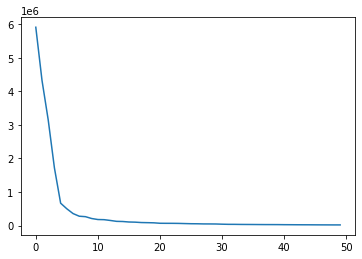

In [162]:
x_var = []
summ = 0
for i in range(50):
    temp_var = np.var( x[:,i] )
    x_var.append(temp_var ) 
    summ+= temp_var


plt.plot(x_var)

In [163]:

x_train = np.zeros((1600,50))
y_train = np.zeros((1600,1))
x_test = np.zeros((400,50))
y_test =  np.zeros((400,1))
n = 0
x_train[0:400,:] = x[0:400,:] 
x_train[400:800,:] = x[500:900,:] 
x_train[800:1200,:] = x[1000:1400,:] 
x_train[1200:1600,:] = x[1500:1900,:] 

y_train[0:400,:] = 0#'2210'
y_train[400:800,:] = 1#'0122'
y_train[800:1200,:] = 2#'2122' 
y_train[1200:1600,:] = 3#'2010' 

x_test[0:100,:] = x[400:500,:]
x_test[100:200,:] = x[900:1000,:]
x_test[200:300,:] = x[1400:1500,:]
x_test[300:400,:] = x[1900:2000,:]

y_test[0:100,:] = 0#'2210'
y_test[100:200,:] = 1#'0122'
y_test[200:300,:] = 2#'2122' 
y_test[300:400,:] = 3#'2010' 


In [164]:
print(x_train.shape,y_train.shape,x_test.shape)

(1600, 50) (1600, 1) (400, 50)


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [166]:

scaler = StandardScaler()
scaler.fit(x_train)
X_test = scaler.transform(x_test)
x_train = scaler.transform(x_train)

print(len(x_test),len(x_train),len(y_train))

400 1600 1600


In [167]:
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=50)

In [168]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.

In [169]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99  1  0  0]
 [ 0 98  2  0]
 [ 0  0 97  3]
 [ 0  4  0 96]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       100
         1.0       0.95      0.98      0.97       100
         2.0       0.98      0.97      0.97       100
         3.0       0.97      0.96      0.96       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400



In [130]:
print(classifier)

KNeighborsClassifier()


In [1]:
import pickle
model = classifier
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'classifier' is not defined

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
classifier = loaded_model.score(x_test, y_test)
print(classifier)

0.975


In [133]:
loaded_model.predict(x_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.